In [1]:
from light_curves import LightCurve
from exposures import Calexp
from task import Run

Run(): class to process and save a bunch of light curves in the same calexps.
* For each Run() instance, all of the data is saved in a folder with the date and time name.

### Main structure

- Create a Run() instance and a list of parameters (dict).
- Add the light curves choosing the params and location (setting ra/dec or a random point within a distance from the first light curve location)
- Add a check point (log_task)

runs/20241106_150520/
(ra,dec) = (57.67048780800139, -32.49757834967935)/nHTM_ID = 9871863798730 - HTM_level=20 (bounded by a circle of radius ~0.27 arcsec.)
Found 150 calexps


/home/karennowo/DP0_microlensing/light_curves.py:107: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data], ignore_index=True)


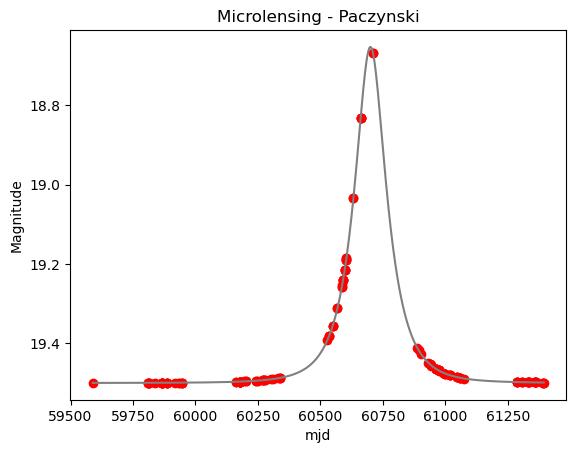

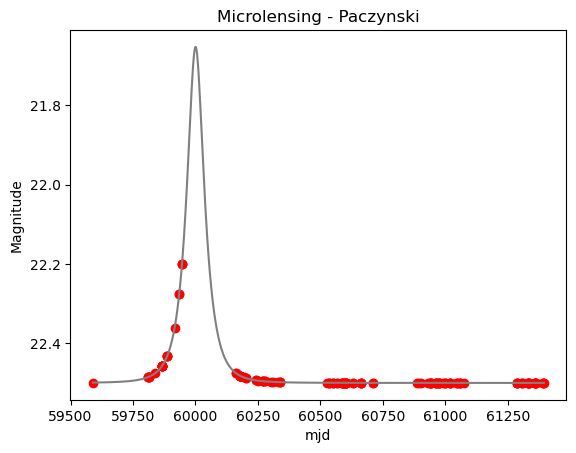

[LightCurve (57.67048780800139, -32.49757834967935) - Band i - Points: 150,
 LightCurve (57.59451632893858, -32.481152201226145) - Band i - Points: 150]

In [2]:
process = Run()
print(process.main_path)
params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": 19.5},
          {"t_0": 60000.5, "t_E": 60, "u_0": 0.5, "m_base": 22.5}]

# for p in params:
#     process.add_lc(p, dist=0.2)

process.add_lc(params[0], ra=57.67048780800139, dec=-32.49757834967935, plot=True)

# process.add_lc(params[1], dist=0.2) 
process.add_lc(params[1], ra=57.59451632893858, dec=-32.481152201226145, plot = True)

process.log_task("Add and simulate light curves", det = len(params))
process.inj_lc # List of injected light curves

- Set and configure tasks to be used in the injection-extraction process

Iterate over the collected calexp:
- Injection
- Measure (contains the entire process with the selected approach)
- Find fluxes in source detected table (needed for this approach but others approachs might not need it)
- Compute magnitudes

In [ ]:
# Set and config tasks
process.inject_task()
schema = process.measure_task()
print(process.tasks) # Saved tasks used
# Iterate on collected calexps 
for j, dataId in enumerate(process.calexp_dataIds[:10]):
    print(f" ------ CALEXP {j} ------")
    calexp = Calexp(dataId)
    injected_exp, injected_points = process.inject_calexp(calexp, save_fit=f"calexp_{j}.fit")
    if injected_exp != None:
        # Approach to measure fluxes and save them in LightCurve.data
        sources = process.measure_calexp(injected_exp, schema)
        flux, flux_err = process.find_flux(sources, injected_points, save=dataId)
        # Compute and save magnitudes in LightCurve.data
        for f, ferr, lc in zip(flux, flux_err, process.inj_lc):
            mag, mag_err = lc.add_mag(f, ferr, dataId, exposure = injected_exp)
            print(f"ra = {lc.ra}, dec = {lc.dec}")
            print("Measured ", mag, mag_err)
            print("Injected ", lc.data["mag_sim"][j])


{'Injection': <lsst.source.injection.inject_visit.VisitInjectTask object at 0x7aa32fb3d3d0>, 'Detection': <lsst.meas.algorithms.detection.SourceDetectionTask object at 0x7aa32fc05a90>, 'Measurement': <lsst.meas.base.sfm.SingleFrameMeasurementTask object at 0x7aa32fd51290>}
 ------ CALEXP 0 ------
Points injected: 2


Founded point in source table in 0 iteration/s
Founded point in source table in 1 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.49613569853327 0.0069670041092543145
Injected  19.499800399179982
ra = 57.59451632893858, dec = -32.481152201226145
Measured  22.574806750115574 0.07916678083074803
Injected  22.499103566670836
 ------ CALEXP 1 ------
Points injected: 2


Founded point in source table in 0 iteration/s
Founded point in source table in 4 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.50468461670903 0.0066166476201801145
Injected  19.499526457030296
ra = 57.59451632893858, dec = -32.481152201226145
Measured  22.51556757542971 0.06701109217281802
Injected  22.485433057027446
 ------ CALEXP 2 ------
No point is contained in the calexp
 ------ CALEXP 3 ------
Points injected: 1


Founded point in source table in 0 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.493690953648894 0.006563352231913072
Injected  19.499526450553148
 ------ CALEXP 4 ------
Points injected: 1


Founded point in source table in 0 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.50461117754591 0.006319683055067099
Injected  19.499520247493123
 ------ CALEXP 5 ------
Points injected: 1


Founded point in source table in 0 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.494230295989425 0.006211115658127441
Injected  19.499520246553935
 ------ CALEXP 6 ------
Points injected: 1


Founded point in source table in 0 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.494679597116846 0.006456096379585158
Injected  19.499520173952803
 ------ CALEXP 7 ------
Points injected: 2


Founded point in source table in 0 iteration/s
Founded point in source table in 1 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.485098735264643 0.0074363817799576095
Injected  19.499466563033558
ra = 57.59451632893858, dec = -32.481152201226145
Measured  22.553279638918777 0.09110823518018148
Injected  22.476119840339543
 ------ CALEXP 8 ------
Points injected: 2


Founded point in source table in 0 iteration/s
Founded point in source table in 4 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.488698042155598 0.008911149903554447
Injected  19.499392031847123
ra = 57.59451632893858, dec = -32.481152201226145
Measured  22.49355323961005 0.11530357199588631
Injected  22.457189257087737
 ------ CALEXP 9 ------
Points injected: 2


### Outputs

* Plot final light curves and show its data (data frame)
* Save the lc as csv

In [ ]:
for lc in process.inj_lc:
    lc.plot()
    print(lc.data[:10])
process.save_lc()

- Time log file
- Plot duration (time_analysis)

In [ ]:
# time_log.csv
import pandas as pd
data_log = process.log # Need to change it to be a DataFrame, not a dict

process.save_time_log()
pd.DataFrame(data_log)[:10]

In [ ]:
process.time_analysis()

In [ ]:
process.inject_table